In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

### 处理丢失数据
- 有两种丢失数据：
    - None
    - np.nan(NaN)

- 两种丢失数据的区别

In [2]:
type(None)

NoneType

In [3]:
type(np.nan)

float

- 为什么在数据分析中需要用到的是浮点类型的空而不是对象类型？
    - 数据分析中会常常使用某些形式的运算来处理原始数据，如果原数数据中的空值为NAN的形式，则不会干扰或者中断运算。
    - NAN可以参与运算的
    - None是不可以参与运算

In [4]:
np.nan + 1

nan

In [8]:
None + 1

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

- 在pandas中如果遇到了None形式的空值则pandas会将其强转成NAN的形式。

In [9]:
df = DataFrame(data=np.random.randint(0,100,size=(7,5)))
df.iloc[2,3] = None
df.iloc[4,2] = np.nan
df.iloc[5,4] = None
df

,0,1,2,3,4
0,35,51,59.0,95.0,81.0
1,32,64,48.0,42.0,71.0
2,32,44,82.0,NaN,92.0
3,46,62,72.0,37.0,16.0
4,35,13,NaN,36.0,51.0
5,27,46,71.0,27.0,NaN
6,14,66,98.0,53.0,18.0


### pandas处理空值操作
- isnull
- notnull
- any
- all
- dropna
- fillna

- **方式1：对空值进行过滤（删除空所在的行数据）df.loc[df.notnull().all(axis=1)]**
    - 技术：isnull，notnull，any，all

In [10]:
df.isnull()

,0,1,2,3,4
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,True,False
3,False,False,False,False,False
4,False,False,True,False,False
5,False,False,False,False,True
6,False,False,False,False,False


In [11]:
#哪些行中有空值
#any(axis=1)检测哪些行中存有空值
df.isnull().any(axis=1) #any会作用isnull返回结果的每一行
#true对应的行就是存有缺失数据的行

0    False
1    False
2     True
3    False
4     True
5     True
6    False
dtype: bool

In [12]:
df.notnull()

,0,1,2,3,4
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,False,True
3,True,True,True,True,True
4,True,True,False,True,True
5,True,True,True,True,False
6,True,True,True,True,True


In [13]:
df.notnull().all(axis=1)

0     True
1     True
2    False
3     True
4    False
5    False
6     True
dtype: bool

In [14]:
#将布尔值作为源数据的行索引
df.loc[df.notnull().all(axis=1)]

,0,1,2,3,4
0,35,51,59.0,95.0,81.0
1,32,64,48.0,42.0,71.0
3,46,62,72.0,37.0,16.0
6,14,66,98.0,53.0,18.0


In [18]:
#获取空对应的行数据
df.loc[df.isnull().any(axis=1)]
#获取空对应行数据的行索引
indexs = df.loc[df.isnull().any(axis=1)].index
indexs

Index([2, 4, 5], dtype='int64')

In [19]:
df.drop(labels=indexs,axis=0)

,0,1,2,3,4
0,35,51,59.0,95.0,81.0
1,32,64,48.0,42.0,71.0
3,46,62,72.0,37.0,16.0
6,14,66,98.0,53.0,18.0


- 方式2：
    - dropna：可以直接将缺失的行或者列进行删除

In [20]:
df.dropna(axis=0)

,0,1,2,3,4
0,35,51,59.0,95.0,81.0
1,32,64,48.0,42.0,71.0
3,46,62,72.0,37.0,16.0
6,14,66,98.0,53.0,18.0


- 对缺失值进行覆盖
    - fillna

In [21]:
df.fillna(value=999) #使用指定值将源数据中所有的空值进行填充

,0,1,2,3,4
0,35,51,59.0,95.0,81.0
1,32,64,48.0,42.0,71.0
2,32,44,82.0,999.0,92.0
3,46,62,72.0,37.0,16.0
4,35,13,999.0,36.0,51.0
5,27,46,71.0,27.0,999.0
6,14,66,98.0,53.0,18.0


In [22]:
#使用空的近邻值进行填充
#method=ffill向前填充，bfill向后填充
df.fillna(axis=0,method='bfill')

,0,1,2,3,4
0,35,51,59.0,95.0,81.0
1,32,64,48.0,42.0,71.0
2,32,44,82.0,37.0,92.0
3,46,62,72.0,37.0,16.0
4,35,13,71.0,36.0,51.0
5,27,46,71.0,27.0,18.0
6,14,66,98.0,53.0,18.0


- 什么时候用dropna什么时候用fillna
    - 尽量使用dropna，如果删除成本比较高，则使用fillna

- 使用空值对应列的均值进行空值填充

In [36]:
for col in df.columns:
    #检测哪些列中存有空值
    if df[col].isnull().sum() > 0:#说明df[col]中存有空值
        mean_value = df[col].mean()
        df[col] = df[col].fillna(value=mean_value)

### 面试题
- 数据说明： 
    - 数据是1个冷库的温度数据，1-7对应7个温度采集设备，1分钟采集一次。

- 数据处理目标：
    - 用1-4对应的4个必须设备，通过建立冷库的温度场关系模型，预估出5-7对应的数据。
    - 最后每个冷库中仅需放置4个设备，取代放置7个设备。
    - f(1-4) --> y(5-7)

- 数据处理过程：
    - 1、原始数据中有丢帧现象，需要做预处理；
    - 2、matplotlib 绘图；
    - 3、建立逻辑回归模型。

- 无标准答案，按个人理解操作即可，请把自己的操作过程以文字形式简单描述一下，谢谢配合。

- 测试数据为testData.xlsx


In [25]:
data = pd.read_excel('../data/testData.xlsx').drop(labels=['none','none1'],axis=1)
data

H:\anaconda\envs\learning\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,time,1,2,3,4,5,6,7
0,2019-01-27 17:00:00,-24.8,-18.2,-20.8,-18.8,NaN,NaN,NaN
1,2019-01-27 17:01:00,-23.5,-18.8,-20.5,-19.8,-15.2,-14.5,-16.0
2,2019-01-27 17:02:00,-23.2,-19.2,NaN,NaN,-13.0,NaN,-14.0
3,2019-01-27 17:03:00,-22.8,-19.2,-20.0,-20.5,NaN,-12.2,-9.8
4,2019-01-27 17:04:00,-23.2,-18.5,-20.0,-18.8,-10.2,-10.8,-8.8
...,...,...,...,...,...,...,...,...
1055,2019-01-28 10:35:00,-26.2,-27.2,-28.8,-27.5,-2.0,NaN,-5.0
1056,2019-01-28 10:36:00,-26.8,-27.5,-29.0,-27.8,-2.2,NaN,-5.0
1057,2019-01-28 10:37:00,-27.2,-27.8,-29.0,-28.0,-2.2,NaN,-5.0
1058,2019-01-28 10:38:00,-27.5,-27.0,-29.0,-28.0,-3.5,-3.2,-5.8


In [26]:
data.shape

(1060, 8)

In [27]:
#删除空对应的行数据
data.dropna(axis=0).shape

(927, 8)

In [50]:
#填充
data.fillna(method='ffill',axis=0).fillna(method='bfill',axis=0)

,time,1,2,3,4,5,6,7
0,2019-01-27 17:00:00,-24.8,-18.2,-20.8,-18.8,-15.2,-14.5,-16.0
1,2019-01-27 17:01:00,-23.5,-18.8,-20.5,-19.8,-15.2,-14.5,-16.0
2,2019-01-27 17:02:00,-23.2,-19.2,-20.5,-19.8,-13.0,-14.5,-14.0
3,2019-01-27 17:03:00,-22.8,-19.2,-20.0,-20.5,-13.0,-12.2,-9.8
4,2019-01-27 17:04:00,-23.2,-18.5,-20.0,-18.8,-10.2,-10.8,-8.8
...,...,...,...,...,...,...,...,...
1055,2019-01-28 10:35:00,-26.2,-27.2,-28.8,-27.5,-2.0,-2.2,-5.0
1056,2019-01-28 10:36:00,-26.8,-27.5,-29.0,-27.8,-2.2,-2.2,-5.0
1057,2019-01-28 10:37:00,-27.2,-27.8,-29.0,-28.0,-2.2,-2.2,-5.0
1058,2019-01-28 10:38:00,-27.5,-27.0,-29.0,-28.0,-3.5,-3.2,-5.8


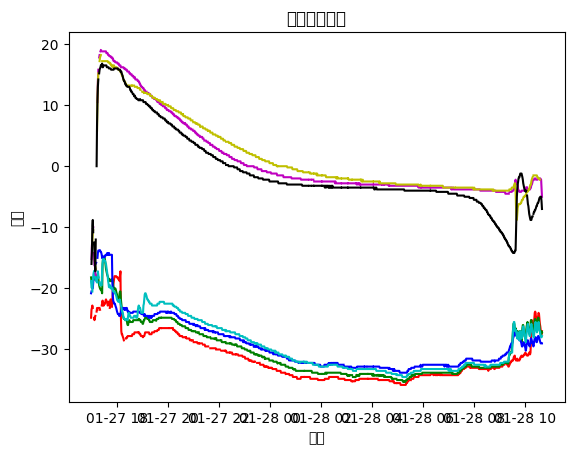

In [54]:
import matplotlib.pyplot as plt
import matplotlib
x_time=data['time']

y1=data[1]
y2=data[2]
y3=data[3]
y4=data[4]
y5=data[5]
y6=data[6]
y7=data[7]
plt.plot(x_time, y1,'r-')
plt.plot(x_time, y2,'g-')
plt.plot(x_time, y3,'b-')
plt.plot(x_time, y4,'c-')
plt.plot(x_time, y5,'m-')
plt.plot(x_time, y6,'y-')
plt.plot(x_time, y7,'k-')

plt.title("温度采集设备") 
 
# fontproperties 设置中文显示，fontsize 设置字体大小
plt.xlabel("时间")
plt.ylabel("温度")
plt.show()

### 处理重复数据

In [55]:
df = DataFrame(data=np.random.randint(0,100,size=(8,6)))
df.iloc[1] = [1,1,1,1,1,1]
df.iloc[3] = [1,1,1,1,1,1]
df.iloc[5] = [1,1,1,1,1,1]
df

,0,1,2,3,4,5
0,59,81,80,35,0,0
1,1,1,1,1,1,1
2,96,36,47,22,83,17
3,1,1,1,1,1,1
4,43,4,49,59,4,25
5,1,1,1,1,1,1
6,51,55,83,99,1,21
7,32,91,21,83,30,95


In [56]:
#检测哪些行存有重复的数据
df.duplicated(keep='first')

0    False
1    False
2    False
3     True
4    False
5     True
6    False
7    False
dtype: bool

In [57]:
df.loc[~df.duplicated(keep='first')]

,0,1,2,3,4,5
0,59,81,80,35,0,0
1,1,1,1,1,1,1
2,96,36,47,22,83,17
4,43,4,49,59,4,25
6,51,55,83,99,1,21
7,32,91,21,83,30,95


In [58]:
#异步到位删除
df.drop_duplicates(keep='first')

,0,1,2,3,4,5
0,59,81,80,35,0,0
1,1,1,1,1,1,1
2,96,36,47,22,83,17
4,43,4,49,59,4,25
6,51,55,83,99,1,21
7,32,91,21,83,30,95


### 处理异常数据
- 自定义一个1000行3列（A，B，C）取值范围为0-1的数据源，然后将C列中的值大于其两倍标准差的异常值进行清洗

In [59]:
df = DataFrame(data=np.random.random(size=(1000,3)),columns=['A','B','C'])
df.head()

,A,B,C
0,0.309135,0.073373,0.760698
1,0.800643,0.563514,0.851651
2,0.251403,0.296048,0.683541
3,0.881829,0.624653,0.206052
4,0.466932,0.036875,0.736617


In [60]:
#制定判定异常值的条件
twice_std = df['C'].std() * 2
twice_std

0.5801374168280147

In [61]:
df.loc[~(df['C'] > twice_std)]

,A,B,C
3,0.881829,0.624653,0.206052
6,0.703533,0.749416,0.193254
9,0.041789,0.035909,0.432638
13,0.627516,0.542269,0.513500
16,0.704042,0.777558,0.492791
...,...,...,...
994,0.309389,0.938084,0.136824
995,0.119959,0.625543,0.100101
996,0.703132,0.464184,0.203401
997,0.840604,0.378559,0.326859
